In [6]:
# load dataset
import pandas as pd

dataset_dir = "./data/IMDB-Dataset.csv"

df = pd.read_csv(dataset_dir)

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
# drop duplicate columns
df.drop_duplicates()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [12]:
import re
import string
import nltk
from bs4 import BeautifulSoup
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK datasets
nltk.download('stopwords')
nltk.download('wordnet')

stop = set(stopwords.words('english'))
wl = WordNetLemmatizer()

# Function to expand contractions


def expand_contractions(text):
    return contractions.fix(text)

# Function to clean text data


def preprocess_text(text):
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()

    text = expand_contractions(text)

    emoji_clean = re.compile("["
                             u"\U0001F600-\U0001F64F"  # emoticons
                             u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                             u"\U0001F680-\U0001F6FF"  # transport & map symbols
                             u"\U0001F1E0-\U0001F1FF"  # flags
                             u"\U00002702-\U000027B0"
                             u"\U000024C2-\U0001F251"
                             "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'', text)

    text = re.sub(r'\.(?=\S)', '. ', text)

    text = re.sub(r'http\S+', '', text)

    text = "".join([char.lower()
                   for char in text if char not in string.punctuation])

    text = " ".join([wl.lemmatize(word) for word in text.split()
                    if word not in stop and word.isalpha()])

    return text


df['review'] = df['review'].apply(preprocess_text)

# save preprocessed data
df.to_csv("./data/IMDB-Dataset-preprocessed.csv", index=False)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/minhtranh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/minhtranh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


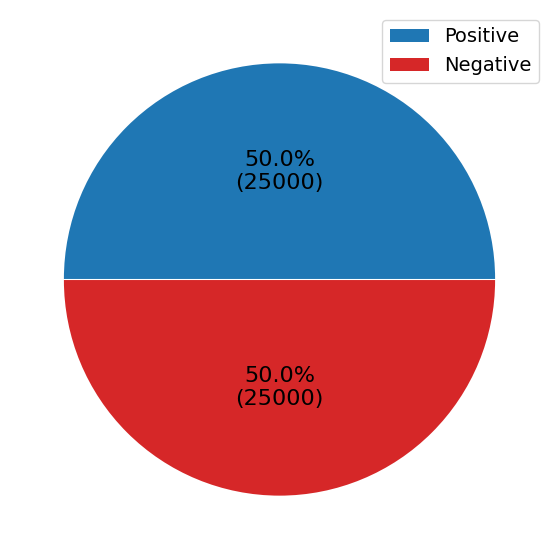

In [10]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])

data = [freq_pos, freq_neg]
labels = ['positive', 'negative']

pie, ax = plt.subplots(figsize=[11, 7])
plt.pie(x=data, autopct=lambda pct: func(pct, data), explode=[0.0025]*2,
        pctdistance=0.5, colors=[sns.color_palette()[0], 'tab:red'], textprops={'fontsize': 16})

labels = ['Positive', 'Negative']
plt.legend(labels, loc="best", prop={'size': 14})

pie.savefig("PieChart.png")
plt.show()

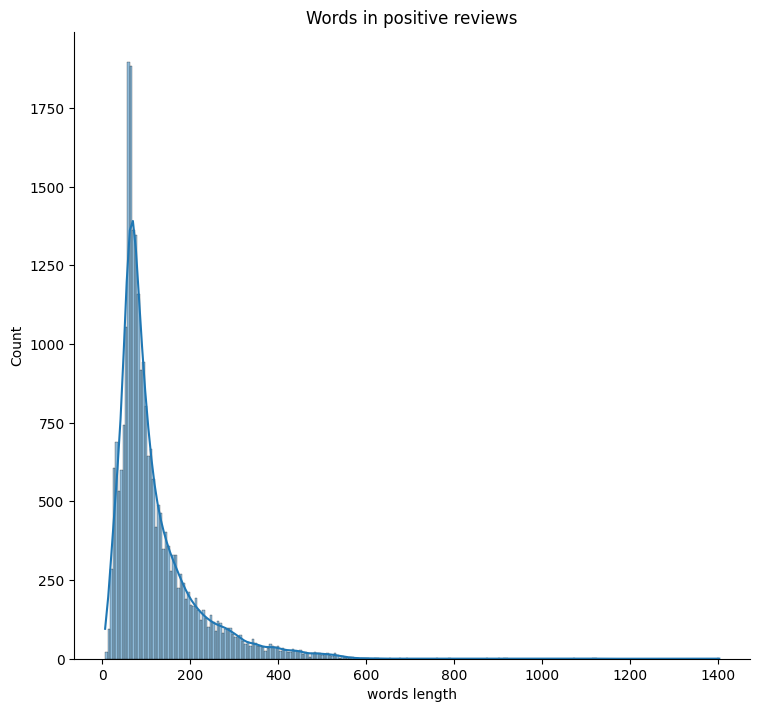

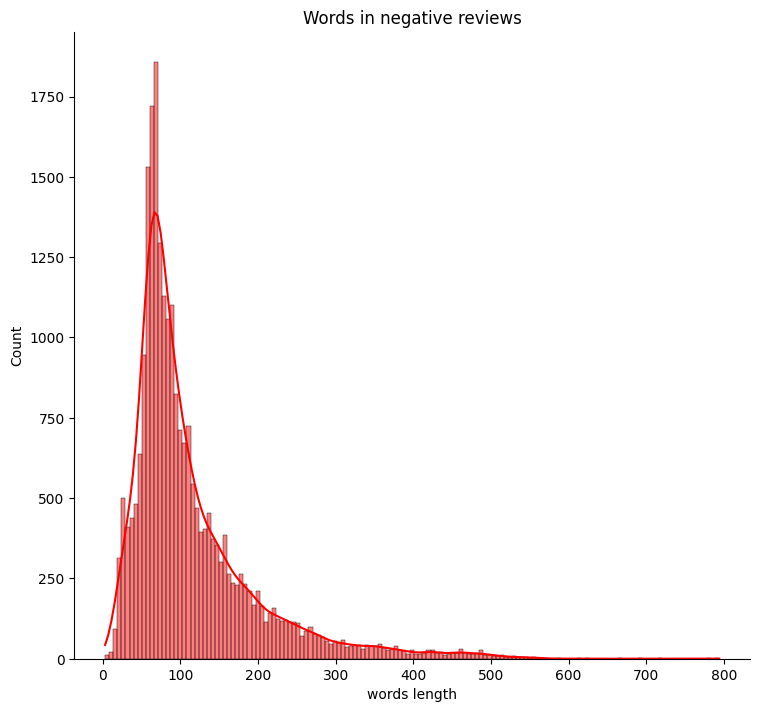

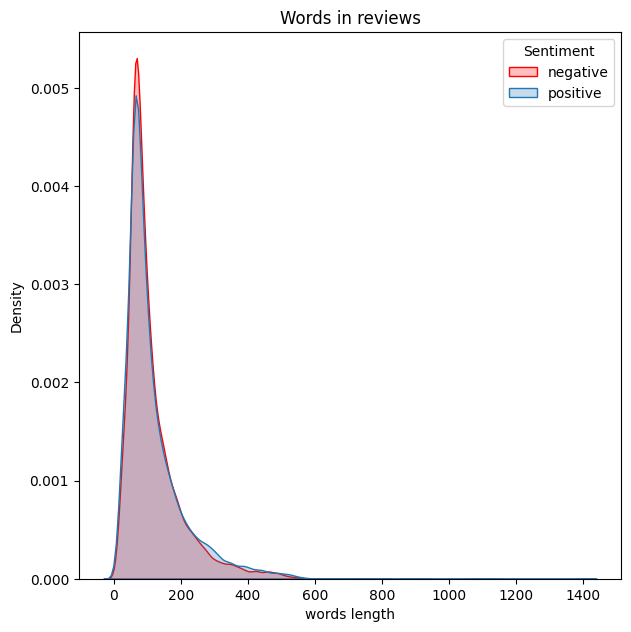

In [11]:

import seaborn as sns
import matplotlib.pyplot as plt

words_len = df['review'].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp['words length'] = words_len

hist_positive = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'positive'],
    x="words length", hue="sentiment", kde=True, height=7, aspect=1.1, legend=False
).set(title='Words in positive reviews')
plt.show()

hist_negative = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'negative'],
    x="words length", hue="sentiment", kde=True, height=7, aspect=1.1, legend=False, palette=['red']
).set(title='Words in negative reviews')
plt.show()

plt.figure(figsize=(7, 7.1))
kernel_distribution_plot = sns.kdeplot(
    data=df_temp, x="words length", hue="sentiment", fill=True, palette=[sns.color_palette()[0], 'red']
).set(title='Words in reviews')

plt.legend(title='Sentiment', labels=['negative', 'positive'])
plt.show()
     